In [1]:
#!pip install seaborn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier

## EDA

In [2]:
df1= pd.read_csv("/kaggle/input/titanic/train.csv")
df2 = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_df = df1[['Sex','Age','Fare','Pclass','Survived']]
train_df.describe()

,Age,Fare,Pclass,Survived
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642,0.383838
std,14.526497,49.693429,0.836071,0.486592
min,0.420000,0.000000,1.000000,0.000000
25%,20.125000,7.910400,2.000000,0.000000
50%,28.000000,14.454200,3.000000,0.000000
75%,38.000000,31.000000,3.000000,1.000000
max,80.000000,512.329200,3.000000,1.000000


In [4]:
test_df = df2[['Sex','Age','Fare','Pclass']]
test_df.describe()


,Age,Fare,Pclass
count,332.000000,417.000000,418.000000
mean,30.272590,35.627188,2.265550
std,14.181209,55.907576,0.841838
min,0.170000,0.000000,1.000000
25%,21.000000,7.895800,1.000000
50%,27.000000,14.454200,3.000000
75%,39.000000,31.500000,3.000000
max,76.000000,512.329200,3.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Pclass    891 non-null    int64  
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     418 non-null    object 
 1   Age     332 non-null    float64
 2   Fare    417 non-null    float64
 3   Pclass  418 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


In [7]:
freq_table = train_df.groupby(['Survived']).size().reset_index(name='count').rename(columns={'Survived':'Survived'}) #to count the amount of value for a variable
freq_table

,Survived,count
0,0,549
1,1,342


In [8]:
#To create a count percentage column and check the percentages
freq_table['count%']= freq_table['count']/sum(freq_table['count'])*100
freq_table

,Survived,count,count%
0,0,549,61.616162
1,1,342,38.383838


In [9]:
train_df.isnull().sum()


Sex           0
Age         177
Fare          0
Pclass        0
Survived      0
dtype: int64

In [10]:
test_df.isnull().sum()

Sex        0
Age       86
Fare       1
Pclass     0
dtype: int64

In [11]:
train_df.corr()


,Age,Fare,Pclass,Survived
Age,1.000000,0.096067,-0.369226,-0.077221
Fare,0.096067,1.000000,-0.549500,0.257307
Pclass,-0.369226,-0.549500,1.000000,-0.338481
Survived,-0.077221,0.257307,-0.338481,1.000000


In [12]:
train_df['Age'].fillna(value=(train_df['Age'].mean()),inplace=True)
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
 3   Pclass    891 non-null    int64  
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
test_df['Age'].fillna(value=(test_df['Age'].mean()),inplace=True)
test_df['Fare'].fillna(value=(test_df['Fare'].mean()),inplace=True)

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     418 non-null    object 
 1   Age     418 non-null    float64
 2   Fare    418 non-null    float64
 3   Pclass  418 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


In [14]:
#Get dummies for Age variable
train_df = pd.get_dummies(train_df, columns=['Sex' ], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex' ], drop_first=True)

In [15]:

#train_df['Age'] = train_df['Age'].astype('category')
#train_df.info()


#test_df['Age'] = test_df['Age'].astype('category')
#test_df['Fare'] = test_df['Fare'].astype('category')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       418 non-null    float64
 1   Fare      418 non-null    float64
 2   Pclass    418 non-null    int64  
 3   Sex_male  418 non-null    uint8  
dtypes: float64(2), int64(1), uint8(1)
memory usage: 10.3 KB


In [16]:
#Split data into predictors and target variables
target = train_df['Survived']
predictors = train_df.drop(['Survived'], axis=1)

In [17]:
#Train and test sets
predictors_train_df, predictors_test_df, target_train_df, target_test_df = train_test_split(predictors, target, test_size=0.5, random_state=0)

## Use only Age, Sex, fare, and Pclass

## Logistic Model

In [18]:
modellog=linear_model.LogisticRegression(penalty='none')

In [19]:
modellog.fit(predictors_train_df,target_train_df)

LogisticRegression(penalty='none')

In [20]:
training=classification_report(modellog.predict(predictors_train_df),target_train_df,output_dict=True)
testing=classification_report(modellog.predict(predictors_test_df),target_test_df,output_dict=True)


In [21]:
#training results
pd.DataFrame(training)

,0,1,accuracy,macro avg,weighted avg
precision,0.860902,0.715084,0.802247,0.787993,0.806835
recall,0.817857,0.775758,0.802247,0.796807,0.802247
f1-score,0.838828,0.744186,0.802247,0.791507,0.803736
support,280.000000,165.000000,0.802247,445.000000,445.000000


In [22]:
#test results
pd.DataFrame(testing)

,0,1,accuracy,macro avg,weighted avg
precision,0.823322,0.705521,0.780269,0.764422,0.779741
recall,0.829181,0.696970,0.780269,0.763076,0.780269
f1-score,0.826241,0.701220,0.780269,0.763730,0.779989
support,281.000000,165.000000,0.780269,446.000000,446.000000


## Random Forest Model


In [23]:
model_RF=RandomForestClassifier(max_depth= 5, min_samples_leaf= 1, min_samples_split= 2)
model_svm=SVC()

In [24]:
model_RF.fit(predictors_train_df,target_train_df)

RandomForestClassifier(max_depth=5)

In [25]:
training=classification_report(model_RF.predict(predictors_train_df),target_train_df,output_dict=True)
testing=classification_report(model_RF.predict(predictors_test_df),target_test_df,output_dict=True)

In [26]:
#training results
pd.DataFrame(training)

,0,1,accuracy,macro avg,weighted avg
precision,0.928571,0.748603,0.85618,0.838587,0.866695
recall,0.845890,0.875817,0.85618,0.860854,0.856180
f1-score,0.885305,0.807229,0.85618,0.846267,0.858461
support,292.000000,153.000000,0.85618,445.000000,445.000000


In [27]:
pd.DataFrame(testing)

,0,1,accuracy,macro avg,weighted avg
precision,0.893993,0.680982,0.816143,0.787487,0.826651
recall,0.829508,0.787234,0.816143,0.808371,0.816143
f1-score,0.860544,0.730263,0.816143,0.795404,0.819357
support,305.000000,141.000000,0.816143,446.000000,446.000000


## Gradient Boosting Classifier

In [28]:
model_XGB= GradientBoostingClassifier(max_depth= 3, min_samples_leaf= 1, min_samples_split= 2)
model_XGB.fit(predictors,target)


GradientBoostingClassifier()

In [29]:
training=classification_report(model_XGB.predict(predictors),target,output_dict=True)
testing=classification_report(model_XGB.predict(predictors_test_df),target_test_df,output_dict=True)

In [30]:
#training results
pd.DataFrame(training)

,0,1,accuracy,macro avg,weighted avg
precision,0.950820,0.809942,0.896745,0.880381,0.902754
recall,0.889267,0.911184,0.896745,0.900226,0.896745
f1-score,0.919014,0.857585,0.896745,0.888300,0.898055
support,587.000000,304.000000,0.896745,891.000000,891.000000


In [31]:

#test results
pd.DataFrame(testing)

,0,1,accuracy,macro avg,weighted avg
precision,0.961131,0.797546,0.901345,0.879338,0.909414
recall,0.891803,0.921986,0.901345,0.906895,0.901345
f1-score,0.925170,0.855263,0.901345,0.890217,0.903069
support,305.000000,141.000000,0.901345,446.000000,446.000000


## Support Vector Machine Model

In [32]:
model_svm.fit(predictors_train_df,target_train_df)

SVC()

In [33]:
training=classification_report(model_svm.predict(predictors_train_df),target_train_df,output_dict=True)
testing=classification_report(model_svm.predict(predictors_test_df),target_test_df,output_dict=True)

In [34]:
#training results
pd.DataFrame(training)

,0,1,accuracy,macro avg,weighted avg
precision,0.894737,0.340782,0.67191,0.617759,0.783946
recall,0.668539,0.685393,0.67191,0.676966,0.671910
f1-score,0.765273,0.455224,0.67191,0.610249,0.703263
support,356.000000,89.000000,0.67191,445.000000,445.000000


In [35]:
#test results
pd.DataFrame(testing)

,0,1,accuracy,macro avg,weighted avg
precision,0.918728,0.294479,0.690583,0.606603,0.819352
recall,0.693333,0.676056,0.690583,0.684695,0.690583
f1-score,0.790274,0.410256,0.690583,0.600265,0.729778
support,375.000000,71.000000,0.690583,446.000000,446.000000


## Neural Network Model

In [36]:
model_nn=MLPClassifier(hidden_layer_sizes=(40,40), random_state=1,alpha=0.0001,max_iter=1000)
model_nn.fit(predictors_train_df,target_train_df)

MLPClassifier(hidden_layer_sizes=(40, 40), max_iter=1000, random_state=1)

In [37]:
training=classification_report(model_nn.predict(predictors_train_df),target_train_df,output_dict=True)
testing=classification_report(model_nn.predict(predictors_test_df),target_test_df,output_dict=True)

In [38]:
#training results
pd.DataFrame(training)

,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.743017,0.811236,0.800080,0.813288
recall,0.832117,0.777778,0.811236,0.804947,0.811236
f1-score,0.844444,0.760000,0.811236,0.802222,0.811995
support,274.000000,171.000000,0.811236,445.000000,445.000000


In [39]:
pd.DataFrame(testing)

,0,1,accuracy,macro avg,weighted avg
precision,0.787986,0.699387,0.755605,0.743686,0.753420
recall,0.819853,0.655172,0.755605,0.737513,0.755605
f1-score,0.803604,0.676558,0.755605,0.740081,0.754039
support,272.000000,174.000000,0.755605,446.000000,446.000000


## Grid Search CV model-XGB

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}


grid_cv = GridSearchCV(model_XGB, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(predictors_train_df, target_train_df)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(target_train_df, grid_cv.predict(predictors_train_df)))
print("Test AUC ROC Score for GS: ", roc_auc_score(target_test_df, grid_cv.predict(predictors_test_df)))

Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.856497716163732
Train AUC ROC Score for GS:  0.8973516192716428
Test AUC ROC Score for GS:  0.8097942725834074


In [41]:
training=classification_report(grid_cv.predict(predictors_train_df),target_train_df,output_dict=True)
testing=classification_report(grid_cv.predict(predictors_test_df),target_test_df,output_dict=True)

In [42]:

#training results
pd.DataFrame(training)

,0,1,accuracy,macro avg,weighted avg
precision,0.951128,0.843575,0.907865,0.897352,0.911491
recall,0.900356,0.920732,0.907865,0.910544,0.907865
f1-score,0.925046,0.880466,0.907865,0.902756,0.908617
support,281.000000,164.000000,0.907865,445.000000,445.000000


In [43]:
#test results
pd.DataFrame(testing)

,0,1,accuracy,macro avg,weighted avg
precision,0.883392,0.736196,0.829596,0.809794,0.832897
recall,0.853242,0.784314,0.829596,0.818778,0.829596
f1-score,0.868056,0.759494,0.829596,0.813775,0.830813
support,293.000000,153.000000,0.829596,446.000000,446.000000


In [44]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

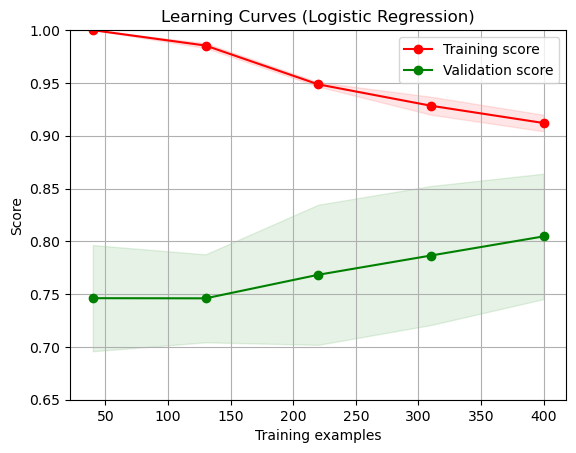

In [45]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(model_XGB, title, 
                    predictors_train_df,target_train_df, ylim=(0.65, 1.00), cv=cv, n_jobs=1);

## Submission

In [46]:
submission = pd.DataFrame({
        "PassengerId": np.array(test_df.index+892),
        "Survived": grid_cv.predict(test_df)
    })

submission.to_csv('submission_XGB2--1312223411.csv',index=False)